# 취합된 데이터 파일 확인

In [241]:
with open ("./data/dacon_total_df_20240503_02.pkl", "rb") as file:
    total_df = pickle.load(file)

In [242]:
pd.set_option('display.max_columns', None)

In [243]:
total_df.head(1)

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter,순이익,매출액
355,ORDER_00329,PRODUCT_07734,SELLER_0146,2017,10,REVIEW_65349,1,2017-10-21,2017-10-22 10:10:28,75.0,20.58,CUSTOMER_06208,delivered,2017-10-05 07:31:49,2017-10-10 02:46:24,2017-10-16 14:36:00,2017-12-07,boleto,1,computers_accessories,CUSTOMER_Unique_06197,50090,recife,PE,30190,belo horizonte,MG,1,4,75.0,95.58


In [244]:
tmp = total_df.groupby(['Customer_unique_id'])[['order_count', 'Freight_value', 'Price']].sum()

In [245]:
tmp.head()

,order_count,Freight_value,Price
Customer_unique_id,,,
CUSTOMER_Unique_00000,1,21.88,124.99
CUSTOMER_Unique_00001,1,46.48,289.00
CUSTOMER_Unique_00002,1,17.79,139.94
CUSTOMER_Unique_00003,1,23.36,149.94
CUSTOMER_Unique_00004,2,59.36,506.52


In [246]:
total_df['Order_purchase_timestamp'] = pd.to_datetime(total_df['Order_purchase_timestamp'])

In [119]:
# 각 고객별 최근 주문 일시를 구합니다.
max_order_timestamps = total_df.groupby('Customer_unique_id')['Order_purchase_timestamp'].transform('max')

# latest_order_timestamp 열에 각 고객별 최근 주문 일시를 할당합니다.
total_df['latest_order_timestamp'] = max_order_timestamps

In [120]:
# 각 고객별 최근 주문 일시를 구합니다.
min_order_timestamps = total_df.groupby('Customer_unique_id')['Order_purchase_timestamp'].transform('min')

# latest_order_timestamp 열에 각 고객별 최근 주문 일시를 할당합니다.
total_df['first_order_timestamp'] = min_order_timestamps

In [123]:
# '재구매여부' 열 추가
total_df['재구매여부'] = total_df['order_count'].apply(lambda x: 'Y' if x >= 2 else 'N')

In [127]:
# '구매간격' 열 추가
total_df['latest_order_timestamp'] = pd.to_datetime(total_df['latest_order_timestamp'])
total_df['first_order_timestamp'] = pd.to_datetime(total_df['first_order_timestamp'])
total_df['구매간격'] = (total_df['latest_order_timestamp'] - total_df['first_order_timestamp']).dt.days

In [131]:
# '구매주기' 열 추가
total_df['구매주기'] = total_df.apply\
(lambda row: 0 if (row['order_count'] - 1 == 0) or (row['구매간격'] == 0) else row['구매간격'] / (row['order_count'] - 1), axis=1)

In [133]:
total_df[total_df['구매주기'] > 0]

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,first_order_timestamp,latest_order_timestamp,재구매여부,구매간격,구매주기
413,REVIEW_00386,ORDER_82569,4,2019-03-10 00:00:00,2019-03-10 23:35:51,PRODUCT_03632,SELLER_1773,59.90,37.30,CUSTOMER_31942,delivered,2019-03-05 22:57:31,2019-03-07 17:55:06,2019-03-09 19:41:40,2019-03-15,credit_card,3,furniture_decor,CUSTOMER_Unique_31537,4855,sao paulo,SP,13076,campinas,SP,2,2019-03-05 22:57:31,2019-03-07 22:26:43,Y,1,1.000000
488,REVIEW_00455,ORDER_73436,5,2018-04-20 00:00:00,2018-04-21 10:54:36,PRODUCT_09746,SELLER_1973,84.99,14.36,CUSTOMER_01577,delivered,2018-04-04 10:41:08,2018-04-04 10:58:13,2018-04-19 06:38:10,2018-04-25,credit_card,1,home_utilities,CUSTOMER_Unique_01575,18520,cerquilho,SP,3029,sao paulo,SP,2,2018-04-04 10:41:08,2018-04-29 16:26:37,Y,25,25.000000
489,REVIEW_00455,ORDER_73436,5,2018-04-20 00:00:00,2018-04-21 10:54:36,PRODUCT_09746,SELLER_1973,84.99,14.36,CUSTOMER_01577,delivered,2018-04-04 10:41:08,2018-04-04 10:58:13,2018-04-19 06:38:10,2018-04-25,voucher,1,home_utilities,CUSTOMER_Unique_01575,18520,cerquilho,SP,3029,sao paulo,SP,2,2018-04-04 10:41:08,2018-04-29 16:26:37,Y,25,25.000000
611,REVIEW_00573,ORDER_38587,1,2018-09-17 00:00:00,2018-09-18 20:58:13,PRODUCT_26578,SELLER_1388,25.00,7.78,CUSTOMER_36787,delivered,2018-09-13 08:00:50,2018-09-15 18:37:57,2018-09-16 15:37:51,2018-09-25,credit_card,3,baby,CUSTOMER_Unique_23531,5617,sao paulo,SP,13257,itatiba,SP,3,2018-09-06 09:58:22,2018-09-13 08:00:50,Y,6,3.000000
2114,REVIEW_01966,ORDER_24366,5,2019-05-13 00:00:00,2019-05-14 02:56:14,PRODUCT_16908,SELLER_0068,10.99,37.04,CUSTOMER_39533,delivered,2019-05-03 06:11:22,2019-05-04 12:50:00,2019-05-12 17:58:30,2019-06-04,credit_card,1,cool_stuff,CUSTOMER_Unique_23151,51021,recife,PE,14940,ibitinga,SP,4,2018-10-09 12:34:39,2019-06-01 11:38:29,Y,234,78.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92540,REVIEW_86424,ORDER_44733,5,2018-06-01 00:00:00,2018-06-04 14:35:15,PRODUCT_24065,SELLER_1730,16.80,15.10,CUSTOMER_85535,delivered,2018-05-20 17:52:37,2018-05-23 10:29:57,2018-05-31 08:42:46,2018-06-13,credit_card,1,pet_shop,CUSTOMER_Unique_36595,87302,campo mourao,PR,2285,sao paulo,SP,2,2018-04-18 21:13:54,2018-05-20 17:52:37,Y,31,31.000000
92563,REVIEW_86446,ORDER_25498,5,2018-12-02 00:00:00,2018-12-02 18:09:25,PRODUCT_10020,SELLER_1927,59.00,12.75,CUSTOMER_31974,delivered,2018-11-23 14:49:21,2018-11-27 17:27:02,2018-12-01 11:51:09,2018-12-13,credit_card,5,furniture_decor,CUSTOMER_Unique_31569,4311,sao paulo,SP,15601,fernandopolis,SP,4,2018-10-04 16:29:27,2018-11-23 14:49:21,Y,49,16.333333
92922,REVIEW_86794,ORDER_77745,5,2019-06-19 00:00:00,2019-06-19 20:54:26,PRODUCT_20775,SELLER_2101,26.74,14.64,CUSTOMER_32450,delivered,2019-06-11 17:56:07,2019-06-14 13:54:00,2019-06-18 17:46:34,2019-06-29,boleto,1,watches_gifts,CUSTOMER_Unique_32031,88015,florianopolis,SC,89041,blumenau,SC,6,2019-02-16 15:56:36,2019-06-11 17:56:07,Y,115,23.000000
93351,REVIEW_87179,ORDER_30796,5,2018-12-07 00:00:00,2018-12-07 17:53:02,PRODUCT_07407,SELLER_2222,64.00,18.02,CUSTOMER_63539,delivered,2018-11-28 13:30:58,2018-11-29 16:02:43,2018-12-06 14:28:59,2018-12-27,credit_card,3,sports_leisure,CUSTOMER_Unique_41294,44065,feira de santana,BA,14070,ribeirao preto,SP,2,2018-11-24 13:33:20,2018-11-28 13:30:58,Y,3,3.000000


In [134]:
total_df[total_df['Customer_unique_id'] == 'CUSTOMER_Unique_85216']

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,first_order_timestamp,latest_order_timestamp,재구매여부,구매간격,구매주기
72894,REVIEW_67953,ORDER_84288,5,2019-02-08 00:00:00,2019-02-10 20:07:29,PRODUCT_27785,SELLER_1049,29.9,14.1,CUSTOMER_88065,delivered,2019-01-24 02:22:12,2019-01-26 21:28:37,2019-02-07 17:42:55,2019-02-22,credit_card,8,electronics,CUSTOMER_Unique_85216,26112,belford roxo,RJ,5588,sao paulo,SP,2,2019-01-24 02:22:12,2019-01-24 02:22:12,Y,0,0.0
72895,REVIEW_67953,ORDER_84288,5,2019-02-08 00:00:00,2019-02-10 20:07:29,PRODUCT_27785,SELLER_1049,29.9,14.1,CUSTOMER_88065,delivered,2019-01-24 02:22:12,2019-01-26 21:28:37,2019-02-07 17:42:55,2019-02-22,voucher,1,electronics,CUSTOMER_Unique_85216,26112,belford roxo,RJ,5588,sao paulo,SP,2,2019-01-24 02:22:12,2019-01-24 02:22:12,Y,0,0.0


In [135]:
total_df[total_df['order_count'] >= 2].sort_values(by='Customer_unique_id')

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,first_order_timestamp,latest_order_timestamp,재구매여부,구매간격,구매주기
64175,REVIEW_59807,ORDER_50057,1,2018-10-26 00:00:00,2018-10-27 09:19:26,PRODUCT_04082,SELLER_0417,59.90,17.67,CUSTOMER_00019,delivered,2018-10-15 11:08:48,2018-10-16 21:36:29,2018-10-25 22:30:58,2018-11-06,credit_card,2,garden_tools,CUSTOMER_Unique_00019,74914,aparecida de goiania,GO,15025,sao jose do rio preto,SP,3,2018-10-15 11:08:48,2018-10-15 11:08:48,Y,0,0.0
24147,REVIEW_22414,ORDER_08495,2,2019-04-27 00:00:00,2019-04-27 20:35:22,PRODUCT_14758,SELLER_1822,11.99,13.47,CUSTOMER_00042,delivered,2019-04-18 14:18:09,2019-04-20 00:47:44,2019-04-26 16:26:38,2019-05-11,boleto,1,furniture_decor,CUSTOMER_Unique_00042,30320,belo horizonte,MG,38408,uberlandia,MG,2,2019-04-18 14:18:09,2019-04-18 14:18:09,Y,0,0.0
24097,REVIEW_22368,ORDER_33608,5,2018-07-22 00:00:00,2018-07-24 11:19:02,PRODUCT_27916,SELLER_1192,99.97,16.14,CUSTOMER_00052,delivered,2018-07-11 09:36:46,2018-07-11 19:42:28,2018-07-21 20:06:22,2018-08-04,credit_card,5,bed_bath_table,CUSTOMER_Unique_00052,75388,trindade,GO,32677,betim,MG,2,2018-07-11 09:36:46,2018-07-11 09:36:46,Y,0,0.0
35447,REVIEW_32926,ORDER_37143,1,2019-06-14 00:00:00,2019-06-18 18:14:36,PRODUCT_02080,SELLER_1933,12.09,18.23,CUSTOMER_00053,delivered,2019-06-06 16:53:30,2019-06-08 14:46:00,2019-06-13 20:48:25,2019-07-17,credit_card,3,home_utilities,CUSTOMER_Unique_00053,85808,cascavel,PR,2030,sao paulo,SP,5,2019-06-06 16:53:30,2019-06-06 16:53:30,Y,0,0.0
73279,REVIEW_68307,ORDER_42637,4,2018-04-05 00:00:00,2018-04-08 23:14:41,PRODUCT_19338,SELLER_0525,14.99,15.56,CUSTOMER_00068,delivered,2018-03-23 11:07:12,2018-03-24 10:36:22,2018-04-04 14:58:07,2018-04-13,credit_card,4,drinks,CUSTOMER_Unique_00068,5890,sao paulo,SP,37706,pocos de caldas,MG,2,2018-03-23 11:07:12,2018-03-23 11:07:12,Y,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,REVIEW_42458,ORDER_13012,1,2018-12-09 00:00:00,2018-12-11 17:51:56,PRODUCT_09019,SELLER_2592,49.00,11.38,CUSTOMER_88049,delivered,2018-11-14 18:25:42,2018-11-23 22:10:31,2018-12-08 00:18:54,2018-12-14,credit_card,2,computers_accessories,CUSTOMER_Unique_85201,59082,natal,RN,12327,jacarei,SP,3,2018-11-14 18:25:42,2018-11-14 18:25:42,Y,0,0.0
90118,REVIEW_84161,ORDER_51621,5,2018-10-31 00:00:00,2018-10-31 14:45:02,PRODUCT_11899,SELLER_2669,47.99,12.69,CUSTOMER_88053,delivered,2018-10-24 10:44:15,2018-10-25 20:37:04,2018-10-30 21:16:59,2018-11-10,boleto,1,bed_bath_table,CUSTOMER_Unique_85205,15063,sao jose do rio preto,SP,14940,ibitinga,SP,2,2018-10-24 10:44:15,2018-10-24 10:44:15,Y,0,0.0
43497,REVIEW_40449,ORDER_07342,1,2019-03-16 00:00:00,2019-03-16 12:32:19,PRODUCT_10765,SELLER_1059,79.99,30.40,CUSTOMER_88064,delivered,2019-01-30 15:28:21,2019-02-16 16:28:33,2019-03-16 20:03:53,2019-03-13,credit_card,6,office_furniture,CUSTOMER_Unique_85215,82410,curitiba,PR,8577,itaquaquecetuba,SP,6,2019-01-30 15:28:21,2019-01-30 15:28:21,Y,0,0.0
72895,REVIEW_67953,ORDER_84288,5,2019-02-08 00:00:00,2019-02-10 20:07:29,PRODUCT_27785,SELLER_1049,29.90,14.10,CUSTOMER_88065,delivered,2019-01-24 02:22:12,2019-01-26 21:28:37,2019-02-07 17:42:55,2019-02-22,voucher,1,electronics,CUSTOMER_Unique_85216,26112,belford roxo,RJ,5588,sao paulo,SP,2,2019-01-24 02:22:12,2019-01-24 02:22:12,Y,0,0.0


In [146]:
tmp2 = total_df.groupby(['Customer_unique_id'], as_index=False)[['order_count', 'Freight_value', 'Price']].sum()

In [149]:
#tmp3 = total_df.groupby(['Customer_unique_id'])[['재구매여부', '구매주기']]
tmp3 = total_df[['Customer_unique_id','재구매여부', '구매주기']]

In [152]:
reorder = pd.merge(tmp2, tmp3, on='Customer_unique_id', how='left')
reorder

,Customer_unique_id,order_count,Freight_value,Price,재구매여부,구매주기
0,CUSTOMER_Unique_00000,1,21.88,124.99,N,0.0
1,CUSTOMER_Unique_00001,1,46.48,289.00,N,0.0
2,CUSTOMER_Unique_00002,1,17.79,139.94,N,0.0
3,CUSTOMER_Unique_00003,1,23.36,149.94,N,0.0
4,CUSTOMER_Unique_00004,2,59.36,506.52,N,0.0
...,...,...,...,...,...,...
93476,CUSTOMER_Unique_85234,1,13.88,74.90,N,0.0
93477,CUSTOMER_Unique_85235,1,14.16,114.90,N,0.0
93478,CUSTOMER_Unique_85236,1,19.04,37.00,N,0.0
93479,CUSTOMER_Unique_85237,1,22.07,689.00,N,0.0


In [234]:
temp = reorder.groupby(['재구매여부'], as_index=False)[['order_count', 'Freight_value', 'Price']].sum()
temp2 = reorder.groupby(['재구매여부'], as_index=False)[['Customer_unique_id']].count()
reorder_yn = pd.merge(temp,temp2, on='재구매여부', how='inner')
reorder_yn 

,재구매여부,order_count,Freight_value,Price,Customer_unique_id
0,N,110654,2151269.03,13140385.94,86955
1,Y,19136,155273.53,723125.05,6526


In [236]:
reorder_yn['Payment_value'] = reorder_yn['Freight_value'] + reorder_yn['Price']
reorder_yn['구매당순이익'] = round(reorder_yn['Price'] / reorder_yn['order_count'], 2)
reorder_yn['구매당운송비'] = round(reorder_yn['Freight_value'] / reorder_yn['order_count'], 2)
reorder_yn['고객당순이익'] = round(reorder_yn['Price'] / reorder_yn['Customer_unique_id'], 0)
reorder_yn['고객당구매수'] = round(reorder_yn['order_count'] / reorder_yn['Customer_unique_id'], 2)
reorder_yn['고객당매출액'] = round(reorder_yn['Payment_value'] / reorder_yn['Customer_unique_id'], 0)

In [237]:
reorder_yn

,재구매여부,order_count,Freight_value,Price,Customer_unique_id,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
0,N,110654,2151269.03,13140385.94,86955,15291654.97,118.75,19.44,151.0,1.27,176.0
1,Y,19136,155273.53,723125.05,6526,878398.58,37.79,8.11,111.0,2.93,135.0


In [158]:
# '구매주기_구간' 열 추가
reorder_filtered = reorder[reorder['구매주기'] > 0]

reorder_filtered['구매주기_구간'] = pd.cut(reorder_filtered['구매주기'], \
                    bins=[-float('inf'), 7, 14, 21, 28, float('inf')], \
                    labels=['7일 이내', '14일 이내', '21일 이내', '28일 이내', '29일 이상'], right=False)
reorder_filtered

,Customer_unique_id,order_count,Freight_value,Price,재구매여부,구매주기,구매주기_구간
218,CUSTOMER_Unique_00188,4,26.87,118.90,Y,28.0,29일 이상
219,CUSTOMER_Unique_00188,4,26.87,118.90,Y,28.0,29일 이상
262,CUSTOMER_Unique_00227,4,22.76,109.90,Y,5.5,7일 이내
483,CUSTOMER_Unique_00414,3,47.23,105.50,Y,32.0,29일 이상
548,CUSTOMER_Unique_00470,5,99.25,578.32,Y,207.0,29일 이상
...,...,...,...,...,...,...,...
84483,CUSTOMER_Unique_76745,3,22.49,74.70,Y,41.0,29일 이상
85230,CUSTOMER_Unique_77444,3,34.90,126.46,Y,176.0,29일 이상
87495,CUSTOMER_Unique_79562,4,23.19,330.32,Y,20.0,21일 이내
90090,CUSTOMER_Unique_82027,4,22.90,163.90,Y,120.0,29일 이상


In [173]:
re_df = reorder_filtered.groupby(['구매주기_구간'], as_index=False)[['Customer_unique_id']].count()

In [175]:
re_df2 = reorder_filtered.groupby(['구매주기_구간'], as_index=False)[['order_count', 'Freight_value', 'Price']].sum()
re_df2

,구매주기_구간,order_count,Freight_value,Price
0,7일 이내,268,2064.68,10571.68
1,14일 이내,134,1287.13,7318.08
2,21일 이내,204,1760.99,5508.40
3,28일 이내,130,891.59,3933.92
4,29일 이상,1373,14743.67,69707.31


In [178]:
re_df3 = pd.merge(re_df, re_df2, on='구매주기_구간', how='inner')
re_df3

,구매주기_구간,Customer_unique_id,order_count,Freight_value,Price
0,7일 이내,42,268,2064.68,10571.68
1,14일 이내,27,134,1287.13,7318.08
2,21일 이내,31,204,1760.99,5508.40
3,28일 이내,22,130,891.59,3933.92
4,29일 이상,260,1373,14743.67,69707.31


In [217]:
re_df3['Payment_value'] = re_df3['Freight_value'] + re_df3['Price']
re_df3['구매당순이익'] = round(re_df3['Price'] / re_df3['order_count'], 2)
re_df3['구매당운송비'] = round(re_df3['Freight_value'] / re_df3['order_count'], 2)
re_df3['고객당순이익'] = round(re_df3['Price'] / re_df3['Customer_unique_id'], 0)
re_df3['고객당구매수'] = round(re_df3['order_count'] / re_df3['Customer_unique_id'], 2)
re_df3['고객당매출액'] = round(re_df3['Payment_value'] / re_df3['Customer_unique_id'], 0)

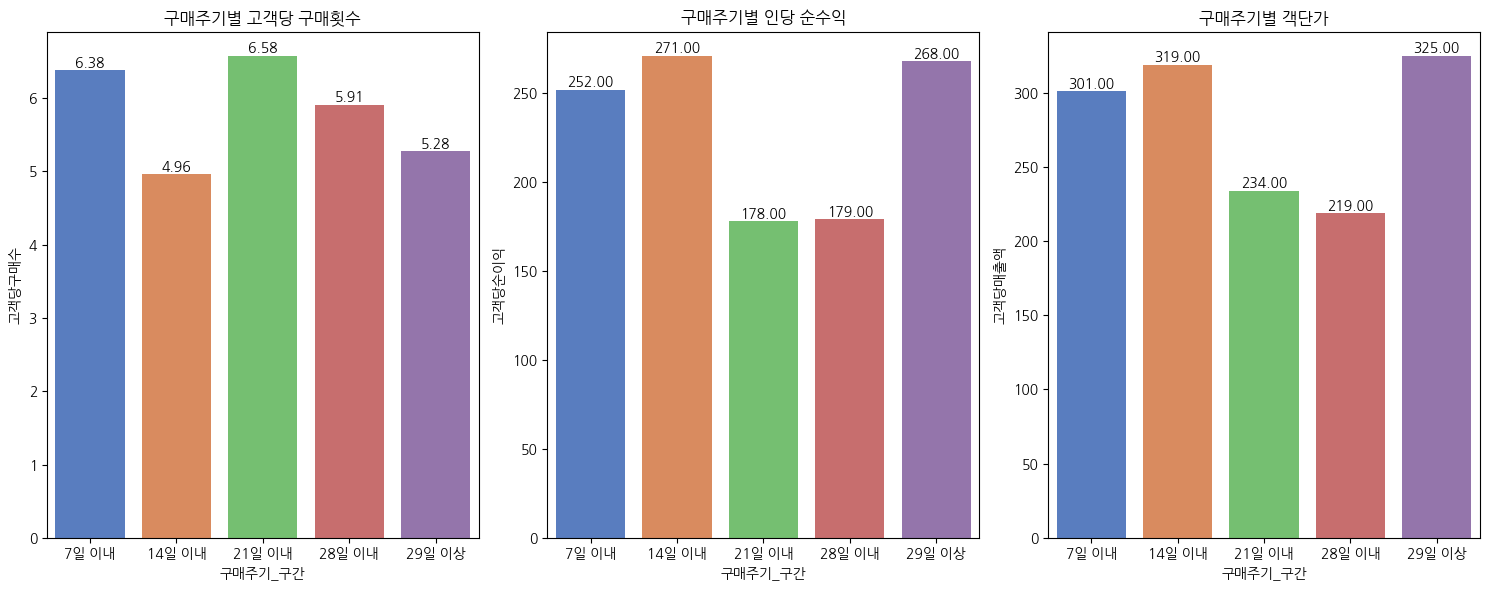

In [221]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))

plt.subplot(1, 3, 1)
sns.barplot(x='구매주기_구간', y='고객당구매수', data=re_df3, palette='muted')
plt.title('구매주기별 고객당 구매횟수')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 3, 2)
sns.barplot(x='구매주기_구간', y='고객당순이익', data=re_df3, palette='muted')
plt.title('구매주기별 인당 순수익')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 3, 3)
sns.barplot(x='구매주기_구간', y='고객당매출액', data=re_df3, palette='muted')
plt.title('구매주기별 객단가')
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [238]:
re_df3.sort_values(by='고객당순이익', ascending=False)

,구매주기_구간,Customer_unique_id,order_count,Freight_value,Price,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당운송비,Payment_value,고객당매출액
1,14일 이내,27,134,1287.13,7318.08,54.61,9.61,271.0,4.96,47.671481,8605.21,319.0
4,29일 이상,260,1373,14743.67,69707.31,50.77,10.74,268.0,5.28,56.706423,84450.98,325.0
0,7일 이내,42,268,2064.68,10571.68,39.45,7.70,252.0,6.38,49.159048,12636.36,301.0
3,28일 이내,22,130,891.59,3933.92,30.26,6.86,179.0,5.91,40.526818,4825.51,219.0
2,21일 이내,31,204,1760.99,5508.40,27.00,8.63,178.0,6.58,56.806129,7269.39,234.0


In [239]:
reorder_yn

,재구매여부,order_count,Freight_value,Price,Customer_unique_id,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
0,N,110654,2151269.03,13140385.94,86955,15291654.97,118.75,19.44,151.0,1.27,176.0
1,Y,19136,155273.53,723125.05,6526,878398.58,37.79,8.11,111.0,2.93,135.0


In [220]:
import pickle

with open("./dacon_term2.pkl", "wb") as file:
    pickle.dump(re_df3, file)